### Probability practice

Part A. Visitors to your website are asked to answer a single survey question before they get access to the content on the page. Among all of the users, there are two categories: Random Clicker (RC), and Truthful Clicker (TC). There are two possible answers to the survey: yes and no. Random clickers would click either one with equal probability. You are also giving the information that the expected fraction of random clickers is 0.3. After a trial period, you get the following survey results: 65% said Yes and 35% said No. What fraction of people who are truthful clickers answered yes? Hint: use the rule of total probability.


#### Part A

    1. P(Y)=P(Y∣RC)⋅P(RC)+P(Y∣TC)⋅P(TC)

    2.  .65 = (.5/.3)*.3 + P(Y∣TC) * . 7

    3.  .5 = P(Y∣TC) * . 7

    4. P(Y∣TC) = .5/.7 = .714


Part B. Imagine a medical test for a disease with the following two attributes:

The sensitivity is about 0.993. That is, if someone has the disease, there is a probability of 0.993 that they will test positive.
The specificity is about 0.9999. This means that if someone doesn't have the disease, there is probability of 0.9999 that they will test negative.
In the general population, incidence of the disease is reasonably rare: about 0.0025% of all people have it (or 0.000025 as a decimal probability).
Suppose someone tests positive. What is the probability that they have the disease?

#### Part B
sensitivity = .993 (disease and test positive)

specificity = .9999 (no disease and test negative)

disease = .000025

not disease = .9975

    1. positive = (prob of positve and disease * disease) + (prob of positive and no disease * No disease)
    2.  = (.993 * .000025) + (X * .999975)
    3.  prob of positive and no disease = 1 - .9999 = .0001
    4.   = (.993 * .000025) + (.0001 * .999975) = 0.0001248225
    5. P(Disease∣Positive) =  P(Positive∣Disease)×P(Disease) / P(Positive) 
    6. P(Disease∣Positive) = (.993 * .000025)/0.0001248225

    7. 0.1988



#### Wrangling the Billboard Top 100

Part A: Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

In [1]:
import pandas as pd

df = pd.read_csv('billboard.csv')
df[['performer', 'song','weeks_on_chart']]
df_count = df.groupby(['performer', 'song'], as_index=False)[['weeks_on_chart']].agg('max')
df_top = df_count.rename(columns={'weeks_on_chart': 'count'})
df_top = df_top.sort_values(by = 'count', ascending = False)[:10]
df_top 

# the table is showing the performer and the song as well as the count which is the number of weeks it was on the 
# billboard top 100. it was found by finding the max of each performer and song combination with the groupby function

,performer,song,count
11194,Imagine Dragons,Radioactive,87
403,AWOLNATION,Sail,79
27121,The Weeknd,Blinding Lights,76
12026,Jason Mraz,I'm Yours,76
15008,LeAnn Rimes,How Do I Live,69
14807,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
18752,OneRepublic,Counting Stars,68
12421,Jewel,Foolish Games/You Were Meant For Me,65
506,Adele,Rolling In The Deep,65
4347,Carrie Underwood,Before He Cheats,64


Part B: Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

<Axes: xlabel='year'>

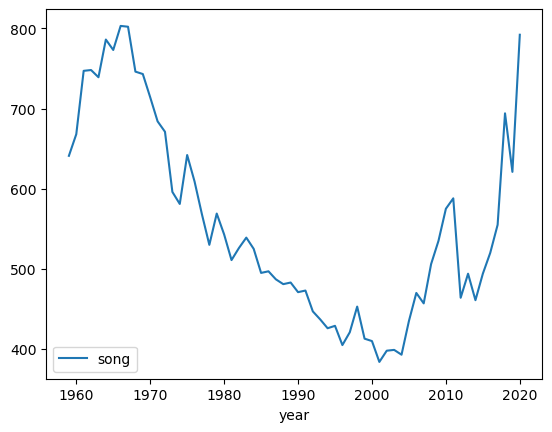

In [2]:
mask = (df['year'] > 1958) & (df['year'] < 2021)
df_years = df[mask]
df_years.groupby('year')[['song']].nunique().plot(kind = 'line')

Part C: Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

Notes:

You might find this easier to accomplish in two distinct sets of data wrangling steps.
Make sure that the individuals names of the artists are readable in your plot, and that they're not all jumbled together. If you find that your plot isn't readable with vertical bars, you can add a coord_flip() layer to your plot to make the bars (and labels) run horizontally instead.
By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you'd like to order them according to some other variable, you can use the fct_reorder function, described in this blog post. This is option

<Axes: xlabel='performer'>

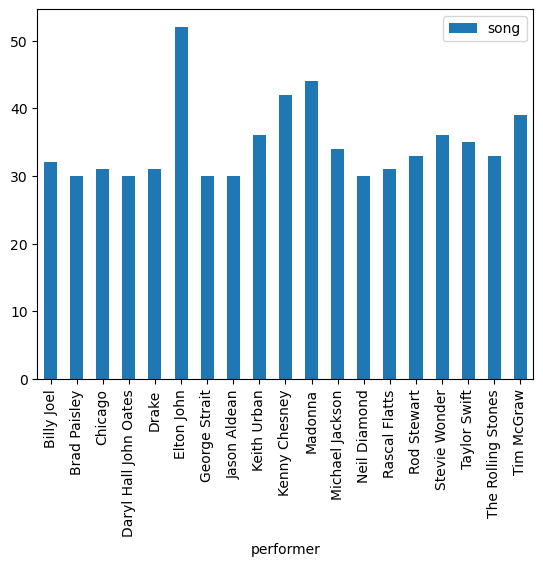

In [ ]:
df_ = df[['song', 'performer', 'weeks_on_chart', 'song_id']]
mask = df_['weeks_on_chart'] >= 10
df_ = df_[mask]
df2 = df_.groupby(['performer', 'song'], as_index=False)['weeks_on_chart'].max()
df3 = df2.groupby(['performer'])[['song']].count()
mask = df3['song'] >= 30
df3[mask].plot(kind = 'bar')

#### Visual story telling part 1: green buildings

Over the past decade, both investors and the general public have paid increasingly close attention to the benefits of environmentally conscious buildings. There are both ethical and economic forces at work here. In commercial real estate, issues of eco-friendliness are intimately tied up with ordinary decisions about how to allocate capital. In this context, the decision to invest in eco-friendly buildings could pay off in at least four ways.

Every building has the obvious list of recurring costs: water, climate control, lighting, waste disposal, and so forth. Almost by definition, these costs are lower in green buildings.
Green buildings are often associated with better indoor environments—the kind that are full of sunlight, natural materials, and various other humane touches. Such environments, in turn, might result in higher employee productivity and lower absenteeism, and might therefore be more coveted by potential tenants. The financial impact of this factor, however, is rather hard to quantify ex ante; you cannot simply ask an engineer in the same way that you could ask a question such as, “How much are these solar panels likely to save on the power bill?”
Green buildings make for good PR. They send a signal about social responsibility and ecological awareness, and might therefore command a premium from potential tenants who want their customers to associate them with these values. It is widely believed that a good corporate image may enable a firm to charge premium prices, to hire better talent, and to attract socially conscious investors.
Finally, sustainable buildings might have longer economically valuable lives. For one thing, they are expected to last longer, in a direct physical sense. (One of the core concepts of the green-building movement is “life-cycle analysis,” which accounts for the high front-end environmental impact of ac- quiring materials and constructing a new building in the first place.) Moreover, green buildings may also be less susceptible to market risk—in particular, the risk that energy prices will spike, driving away tenants into the arms of bolder, greener investors.


The file greenbuildings.csv contains data on 7,894 commercial rental properties from across the United States. Of these, 685 properties have been awarded either LEED or EnergyStar certification as a green building. You can easily find out more about these rating systems on the web, e.g. at www.usgbc.org. The basic idea is that a commercial property can receive a green certification if its energy efficiency, carbon footprint, site selection, and building materials meet certain environmental benchmarks, as certified by outside engineers.

A group of real estate economists constructed the data in the following way. Of the 1,360 green-certified buildings listed as of December 2007 on the LEED or EnergyStar websites, current information about building characteristics and monthly rents were available for 685 of them. In order to provide a control population, each of these 685 buildings was matched to a cluster of nearby commercial buildings in the CoStar database. Each small cluster contains one green-certified building, and all non-rated buildings within a quarter-mile radius of the certified building. On average, each of the 685 clusters contains roughly 12 buildings, for a total of 7,894 data points.

an Austin real-estate developer is interested in the possible economic impact of "going green" in her latest project: a new 15-story mixed-use building on East Cesar Chavez, just across I-35 from downtown. Will investing in a green building be worth it, from an economic perspective? The baseline construction costs are $100 million, with a 5 expected premium for green certification.

I began by cleaning the data a little bit. In particular, I noticed that a handful of the buildings in the data set had very low occupancy rates (less than 10 of available space occupied). I decided to remove these buildings from consideration, on the theory that these buildings might have something weird going on with them, and could potentially distort the analysis. Once I scrubbed these low-occupancy buildings from the data set, I looked at the green buildings and non-green buildings separately. The median market rent in the non-green buildings was $25 per square foot per year, while the median market rent in the green buildings was $27.60 per square foot per year: about $2.60 more per square foot. (I used the median rather than the mean, because there were still some outliers in the data, and the median is a lot more robust to outliers.) Because our building would be 250,000 square feet, this would translate into an additional $250000 x 2.6 = $650000 of extra revenue per year if we build the green building.

Our expected baseline construction costs are $100 million, with a 5 expected premium for green certification. Thus we should expect to spend an extra $5 million on the green building. Based on the extra revenue we would make, we would recuperate these costs in $5000000 /650000 = 7.7 years. Even if our occupancy rate were only 90, we would still recuperate the costs in a little over 8 years. Thus from year 9 onwards, we would be making an extra $650,000 per year in profit. Since the building will be earning rents for 30 years or more, it seems like a good financial move to build the green building.



Do you agree with the conclusions of her on-staff stats guru? If so, point to evidence supporting his case. If not, explain specifically where and why the analysis goes wrong, and how it can be improved. Do you see the possibility of confounding variables for the relationship between rent and green status? If so, provide evidence for confounding, and see if you can also make a picture that visually shows how we might "adjust" for such a confounder. Tell your story in pictures, with appropriate introductory and supporting text.



In [ ]:
df = pd.read_csv('greenbuildings.csv')
df.loc[5]

CS_PropertyID         94765.000000
cluster                   1.000000
size                 231633.000000
empl_gr                   2.220000
Rent                     43.160000
leasing_rate             92.740000
stories                  14.000000
age                      20.000000
renovated                 0.000000
class_a                   1.000000
class_b                   0.000000
LEED                      0.000000
Energystar                0.000000
green_rating              0.000000
net                       0.000000
amenities                 1.000000
cd_total_07            4988.000000
hd_total07               58.000000
total_dd_07            5046.000000
Precipitation            42.570000
Gas_Costs                 0.013731
Electricity_Costs         0.029045
cluster_rent             36.780000
Name: 5, dtype: float64

In [ ]:
'''
we see that green buildings have a higher cost in rent and higher leasing rate which aligns with the staff
'''
df.groupby('green_rating')[['Rent', 'leasing_rate']].agg('mean')

,Rent,leasing_rate
green_rating,,
0,28.266778,81.972061
1,30.016029,89.281898


In [ ]:
'''
also important to note that evem within the green building it is important to know if they will have a LEED or 
Energystar certification as the latter brings in higher numbers
'''
print(df.groupby('LEED')[['Rent', 'leasing_rate']].agg('mean'))
print(df.groupby('Energystar')[['Rent', 'leasing_rate']].agg('mean'))

          Rent  leasing_rate
LEED                        
0     28.40974     82.569568
1     29.70037     87.949630
                 Rent  leasing_rate
Energystar                         
0           28.272890     82.007401
1           30.075376     89.418480


In [ ]:
'''
we are also able to see that all green buildings are classified as class a or b with many of them being a class_a

'''
df.groupby('green_rating')[['class_a', 'class_b']].agg(['sum', 'count'])

class_a       class_b      
                 sum count     sum count
green_rating                            
0               2611  7209    3495  7209
1                546   685     132   685

In [ ]:
'''
we also need to account for the fact that most green buildings are a lot younger in age and hold many more stories 
thus the size being also a lot bigger 
'''
df.groupby('green_rating')[['age', 'stories', 'size']].agg(['mean', 'median'])



age           stories                  size          
                   mean median       mean median           mean    median
green_rating                                                             
0             49.467333   37.0  13.418643   10.0  225977.270495  118696.0
1             23.845255   22.0  15.329927   11.0  325781.319708  241150.0

In [ ]:

'''
electricity costs are alot higher when it is just Energystar or neither. the best is LEED or both LEED and Energystar rating

'''
df.groupby(['LEED', 'Energystar'])[['Electricity_Costs']].agg(['mean', 'median'])

Electricity_Costs          
                             mean    median
LEED Energystar                            
0    0                   0.030899  0.032737
     1                   0.031912  0.037800
1    0                   0.027717  0.023300
     1                   0.027729  0.026200

In [ ]:

'''
we see the opposite problem here in comparison to the electricity cost. LEED is higher while having neither 
or just Energystar brings in a lower cost 
'''
df.groupby(['LEED', 'Energystar'])[['Gas_Costs']].agg(['median', 'mean'])

Gas_Costs          
                   median      mean
LEED Energystar                    
0    0           0.010296  0.011359
     1           0.010300  0.010977
1    0           0.012300  0.012532
     1           0.012800  0.012043

In [ ]:
df.groupby(['LEED', 'Energystar'])[['empl_gr', 'renovated']].agg(['median', 'mean', 'count'])

empl_gr                 renovated                
                 median      mean count    median      mean count
LEED Energystar                                                  
0    0             1.97  3.178233  7141       0.0  0.395339  7209
     1             2.38  3.628304   625       0.0  0.204437   631
1    0             1.74  2.097872    47       0.0  0.319149    47
     1             1.97  2.071429     7       0.0  0.285714     7

I conclude that yes the green buildings charge more for rent and have a higher leasing rate, however costs for these green rated buildings are also higher. The data could also be a bit skewed as on average the green buildings are larger and newer, have more recent rennovations, and have a greater proprtion of buildings classified as class_a. So yes when looking at possible revenue they are not wrong in that you can earn more. Must also see that 
the type of green_rating also matters in terms of costs, rent, and leasing rate. concluding that its more than just 
building green but also choosing over LEED or Energystar. 

#### Visual story telling part 2: Capital Metro data

The file capmetro_UT.csv contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus. These data track ridership on buses in the UT area. Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop. Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018. The variables are:

timestamp: the beginning of the 15-minute window for that row of data
boarding: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window
alighting: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window
day_of_week and weekend: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.
temperature: temperature at that time in degrees F
hour_of_day: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
month: July through December
Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)

In [ ]:
df = pd.read_csv('capmetro_UT.csv')
df

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend
...,...,...,...,...,...,...,...,...
5819,2018-11-30 20:45:00,43,29,Fri,70.73,20,Nov,weekday
5820,2018-11-30 21:00:00,24,19,Fri,69.88,21,Nov,weekday
5821,2018-11-30 21:15:00,33,16,Fri,69.88,21,Nov,weekday
5822,2018-11-30 21:30:00,25,15,Fri,69.88,21,Nov,weekday


'\nwe see that many it is the busiest during the time periods between 3pm-5pm with the peak being at 4pm.\nthis can be seen as it is the time where students are largely going to class and taking the bus \nand when classes finish and they take the bus home \n\n'

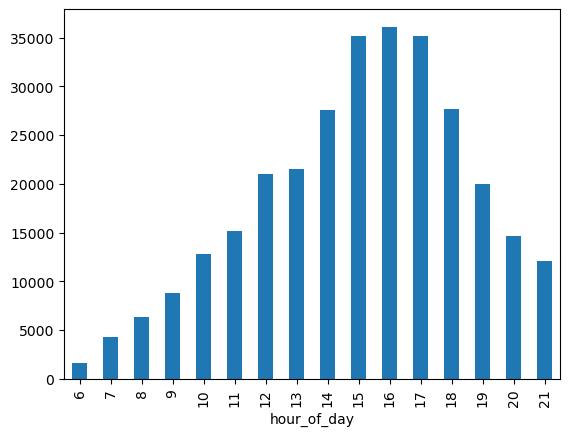

In [ ]:
df.groupby('hour_of_day')['boarding'].sum().plot(kind = 'bar')

'''
we see that many it is the busiest during the time periods between 3pm-5pm with the peak being at 4pm.
this can be seen as it is the time where students are largely going to class and taking the bus 
and when classes finish and they take the bus home 

'''

'\nwe see many people getting off the bus in the early morning 7-10am this can be part of studnets having to class\nand commuting from off-campus locations but could also be attributed to workers going to work\n'

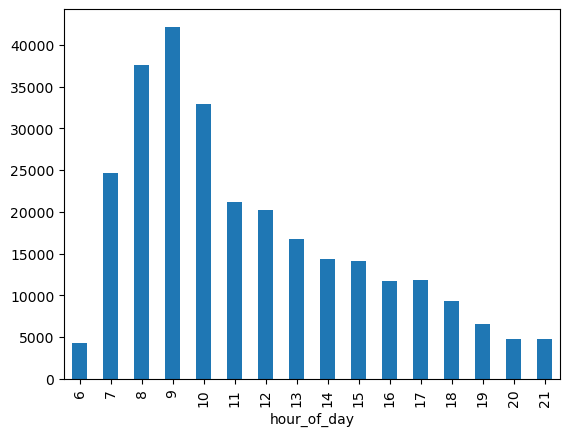

In [ ]:
df.groupby('hour_of_day')['alighting'].sum().plot(kind = 'bar')
'''
we see many people getting off the bus in the early morning 7-10am this can be part of studnets having to class
and commuting from off-campus locations but could also be attributed to workers going to work
'''

'\nwe see that the bus is largely used during the weekdays, or school days by drastic amounts in comparison to the \nweekends\n'

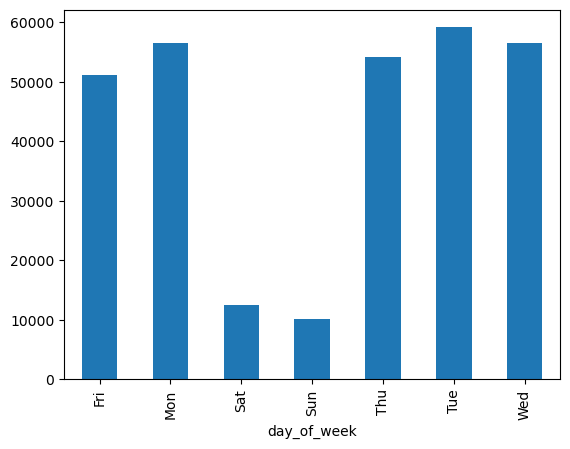

In [ ]:
df.groupby('day_of_week')['boarding'].sum().plot(kind = 'bar')

'''
we see that the bus is largely used during the weekdays, or school days by drastic amounts in comparison to the 
weekends
'''


<Axes: xlabel='day_of_week'>

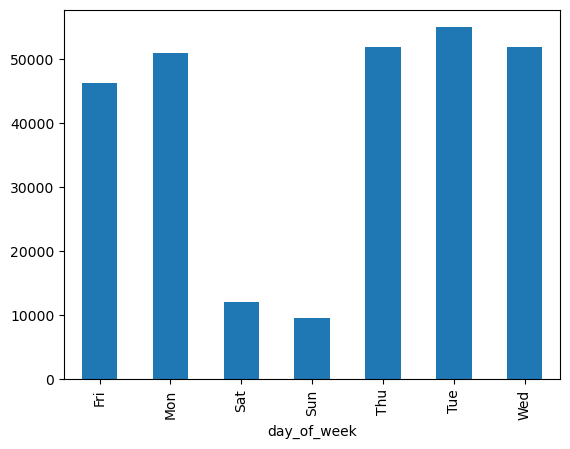

In [ ]:
df.groupby('day_of_week')['alighting'].sum().plot(kind = 'bar')

'\nwe see that the buses are the lease active in November which makes sense since students\nare gone during the november for 1 week \n'

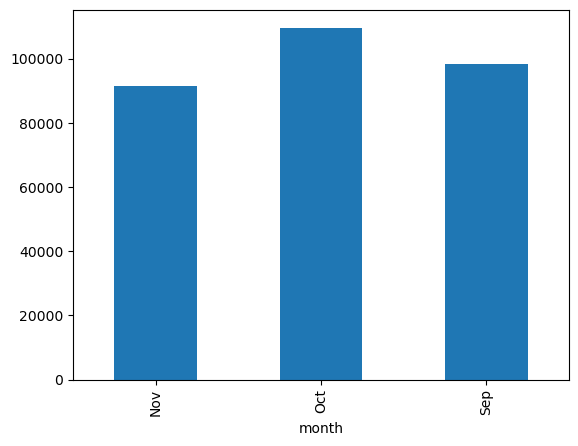

In [ ]:
df.groupby('month')['boarding'].sum().plot(kind = 'bar')

'''
we see that the buses are the lease active in November which makes sense since students
are gone during the november for 1 week 
'''

'\nwe also see that many more people opt to use public transport when its not too cold or not too hot \n'

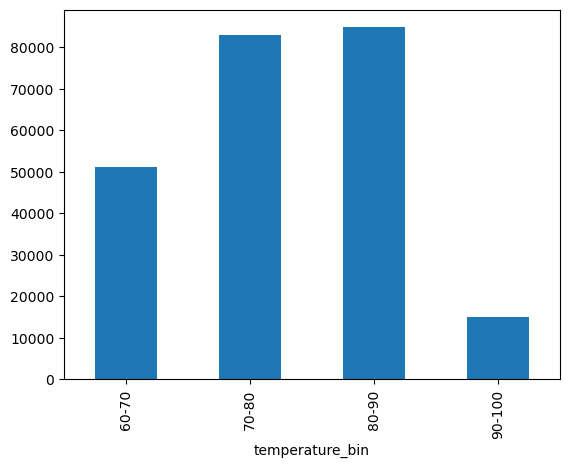

In [ ]:
bin_edges = [60, 70, 80, 90, 100]
bin_labels = ['60-70', '70-80', '80-90', '90-100']
df['temperature_bin'] = pd.cut(df['temperature'], bins=bin_edges, labels=bin_labels, right=False)
df.groupby('temperature_bin')['boarding'].sum().plot(kind = 'bar')
'''
we also see that many more people opt to use public transport when its not too cold or not too hot 
'''

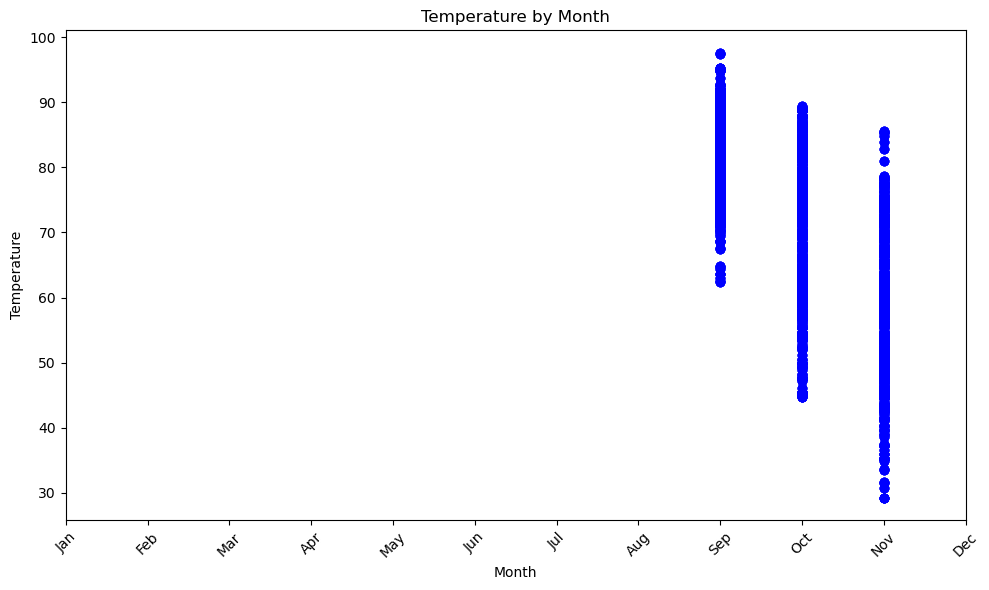

'\na reason as to why the buses were also not being used in both drastic temperatures was also because studnets \nwere gone in November\n'

In [ ]:
import matplotlib.pyplot as plt
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['month'].cat.codes, df['temperature'], marker='o', color='blue')  # Convert month to numeric codes for plotting
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(ticks=range(len(months_order)), labels=months_order, rotation=45)  # Label x-axis with month names
plt.title('Temperature by Month')
plt.tight_layout()  # Adjust plot to fit labels
plt.show()

'''
a reason as to why the buses were also not being used in both drastic temperatures was also because students 
were gone in November
'''

#### Clustering and dimensionality reduction

The data in wine.csv contains information on 11 chemical properties of 6500 different bottles of vinho verde wine from northern Portugal. In addition, two other variables about each wine are recorded:

whether the wine is red or white
the quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs.
Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results. Which dimensionality reduction technique makes the most sense to you for this data? Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties. Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.

To clarify: I'm not asking you to run a supervised learning algorithms. Rather, I'm asking you to see whether the differences in the labels (red/white and quality score) emerge naturally from applying an unsupervised technique to the chemical properties. This should be straightforward to assess using plots.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine.csv')
df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


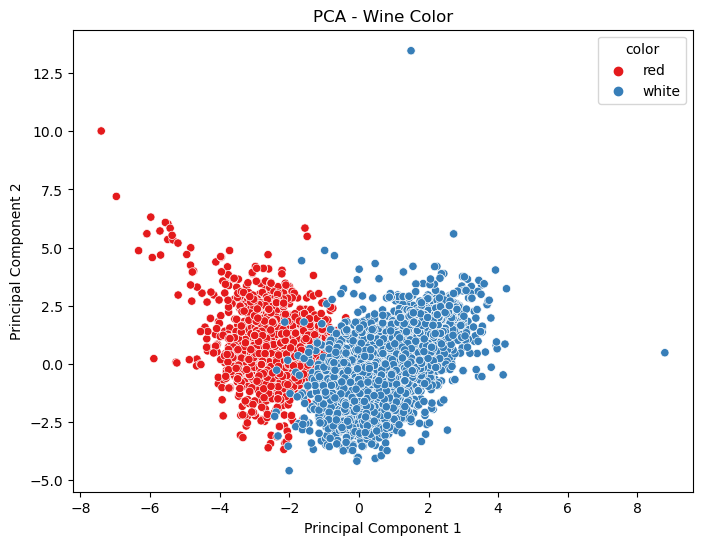

In [ ]:
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['color'], palette='Set1')
plt.title('PCA - Wine Color')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


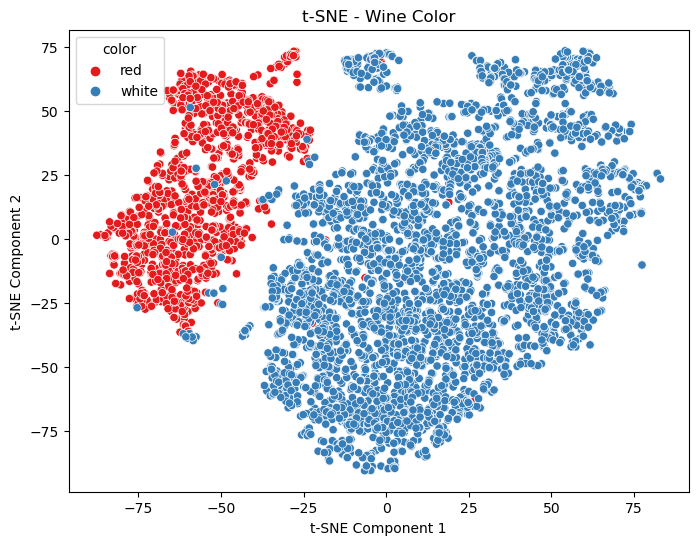

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['color'], palette='Set1')
plt.title('t-SNE - Wine Color')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

/Users/Sam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


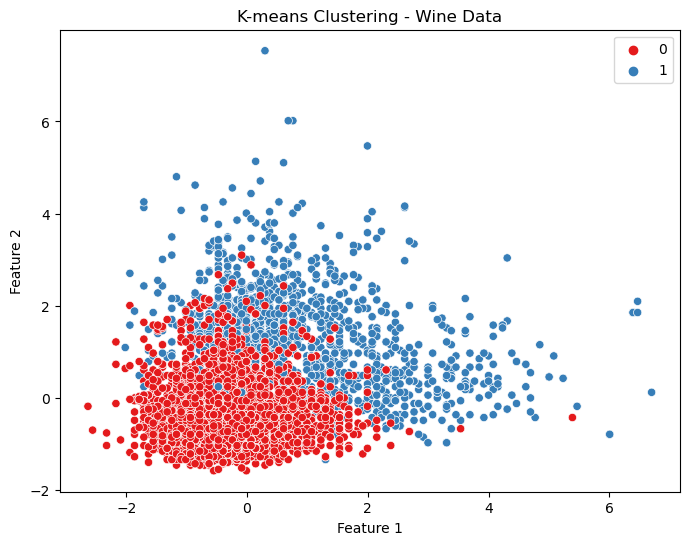

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='Set1')
plt.title('K-means Clustering - Wine Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

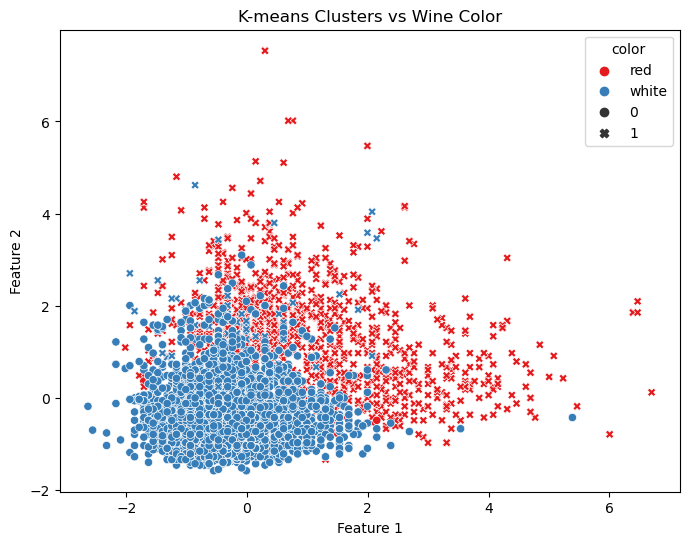

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['color'], palette='Set1', style=clusters)
plt.title('K-means Clusters vs Wine Color')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

tSNE plot seems to be doing the best in splotting the red and white wines in comparison to PCA and K-means.
many points are overlapping in the K-menas and for the PCA plot there are distinct clusters but in comparison the 
tSNE has a more distinct line between them and both have some overlap of points

#### Market segmentation

Consider the data in social_marketing.csv. This was data collected in the course of a market-research study using followers of the Twitter account of a large consumer brand that shall remain nameless---let's call it "NutrientH20" just to have a label. The goal here was for NutrientH20 to understand its social-media audience a little bit better, so that it could hone its messaging a little more sharply.

A bit of background on the data collection: the advertising firm who runs NutrientH20's online-advertising campaigns took a sample of the brand's Twitter followers. They collected every Twitter post ("tweet") by each of those followers over a seven-day period in June 2014. Every post was examined by a human annotator contracted through Amazon's Mechanical Turk service. Each tweet was categorized based on its content using a pre-specified scheme of 36 different categories, each representing a broad area of interest (e.g. politics, sports, family, etc.) Annotators were allowed to classify a post as belonging to more than one category. For example, a hypothetical post such as "I'm really excited to see grandpa go wreck shop in his geriatic soccer league this Sunday!" might be categorized as both "family" and "sports." You get the picture.

Each row of social_marketing.csv represents one user, labeled by a random (anonymous, unique) 9-digit alphanumeric code. Each column represents an interest, which are labeled along the top of the data file. The entries are the number of posts by a given user that fell into the given category. Two interests of note here are "spam" (i.e. unsolicited advertising) and "adult" (posts that are pornographic, salacious, or explicitly sexual). There are a lot of spam and pornography "bots" on Twitter; while these have been filtered out of the data set to some extent, there will certainly be some that slip through. There's also an "uncategorized" label. Annotators were told to use this sparingly, but it's there to capture posts that don't fit at all into any of the listed interest categories. (A lot of annotators may used the "chatter" category for this as well.) Keep in mind as you examine the data that you cannot expect perfect annotations of all posts. Some annotators might have simply been asleep at the wheel some, or even all, of the time! Thus there is some inevitable error and noisiness in the annotation process.

Your task to is analyze this data as you see fit, and to prepare a concise report for NutrientH20 that identifies any interesting market segments that appear to stand out in their social-media audience. You have complete freedom in deciding how to pre-process the data and how to define "market segment." (Is it a group of correlated interests? A cluster? A latent factor? Etc.) Just use the data to come up with some interesting, well-supported insights about the audience, and be clear about what you did.

In [ ]:
df = pd.read_csv('social_marketing.csv')
df

,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7877,y3ijoqfgd,5,4,2,1,0,1,0,1,0,...,0,0,0,0,0,2,0,0,0,0
7878,n6gud4ext,9,3,2,4,0,1,0,4,1,...,0,1,0,1,0,5,0,1,0,0
7879,f71rt6cyg,3,2,1,1,0,4,1,2,1,...,1,0,1,1,0,6,1,0,0,0
7880,gevsyip7o,3,2,0,4,0,0,1,1,1,...,0,0,1,0,0,1,1,0,1,12


In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df.fillna(0, inplace=True)
df = df.drop(columns=['Unnamed: 0'])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

/Users/Sam/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


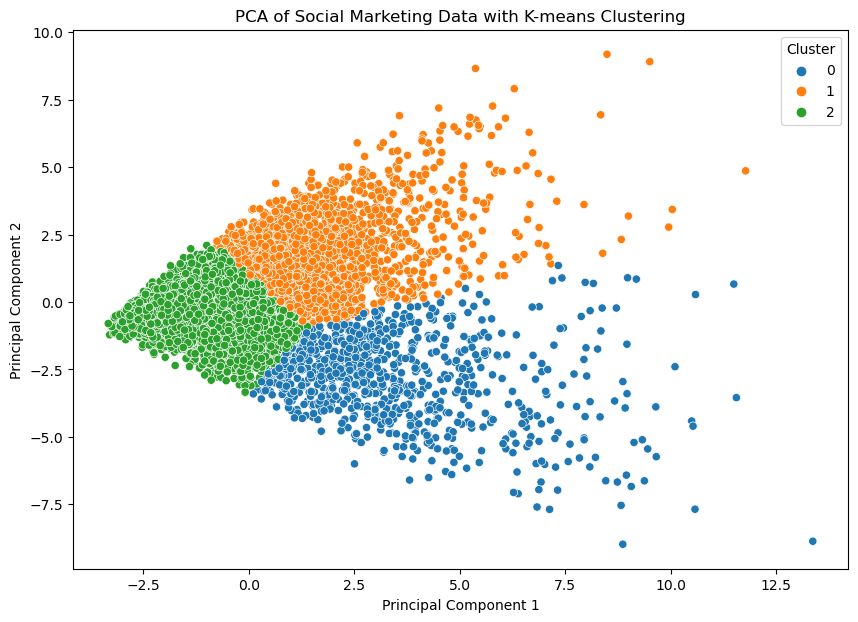

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0) 
clusters = kmeans.fit_predict(data_pca)

data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='tab10')
plt.title('PCA of Social Marketing Data with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

for cluster_id, cluster_data in data.groupby('Cluster'):
    print(f"Cluster {cluster_id} characteristics:")
    print(cluster_data.mean())
    print("\n")

          chatter  current_events    travel  photo_sharing  uncategorized  \
Cluster                                                                     
0        4.033643        1.698376  1.777262       2.402552       0.740139   
1        6.464110        1.858407  2.251721       4.903638       1.190265   
2        3.619334        1.361011  1.279783       1.847373       0.671681   

          tv_film  sports_fandom  politics      food    family  ...  religion  \
Cluster                                                         ...             
0        1.120650       5.785383  2.126450  4.403712  2.450116  ...  5.025522   
1        1.622419       1.287611  2.630285  1.511799  0.915438  ...  0.846608   
2        0.836342       0.994384  1.386883  0.831127  0.568592  ...  0.517449   

           beauty  parenting    dating    school  personal_fitness   fashion  \
Cluster                                                                        
0        1.024362   3.857309  0.759861  2.589327

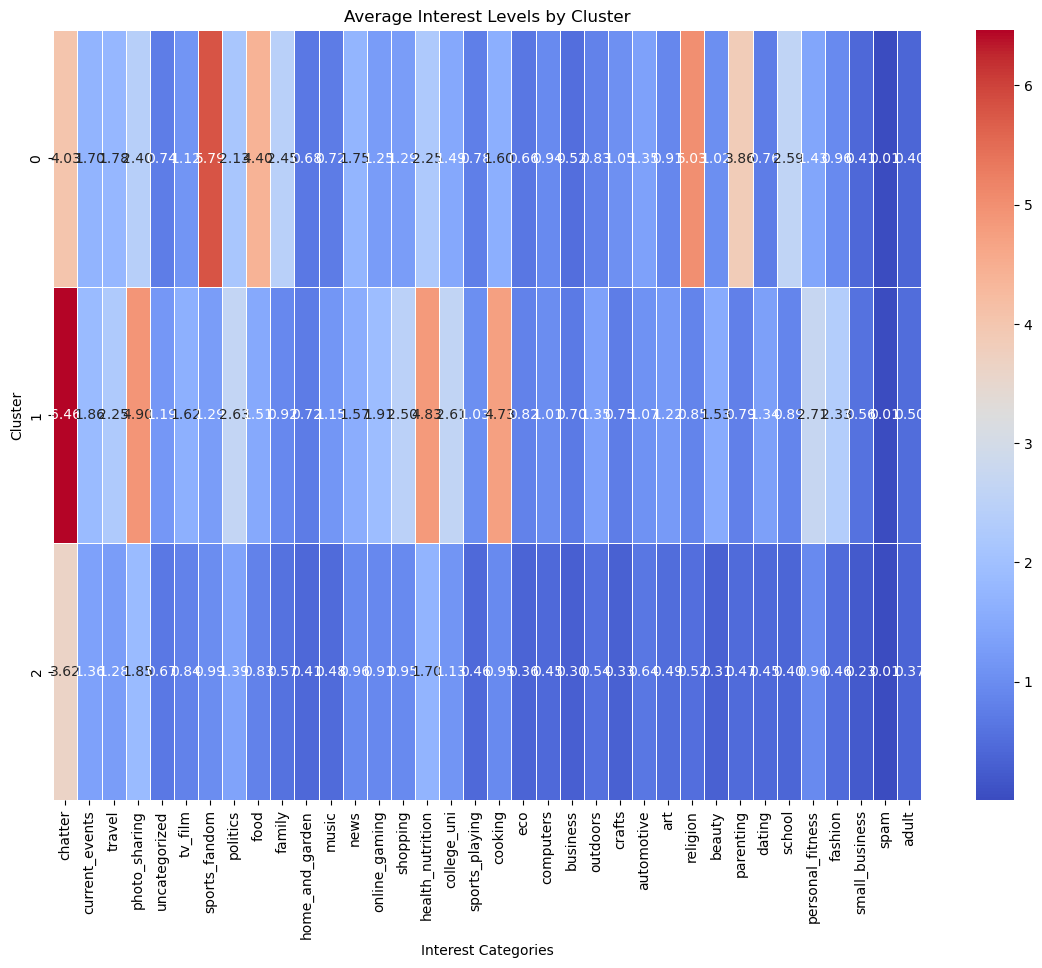

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Average Interest Levels by Cluster')
plt.xlabel('Interest Categories')
plt.ylabel('Cluster')
plt.xticks(rotation=90)
plt.show()

after doing clustering and seperating it into 3 clusters. we are able to see that in cluster 0 that the sports,religion, parenting, and food characteristics are higher. in cluster 1 chatter, photo_sharing, health, and cooking are higher in charactersistics. lastly in cluster 2 we see that chatter is the only one that is higher than normal, it can be seen as the cluster that is grabbing the rest of the data. when increasing the cluster size this continued to occur therefore I kept it at size 3 

#### The Reuters corpus

Your task is simple: tell an interesting story, anchored in some analytical tools we have learned in this class, using this data. For example:

you could cluster authors or documents and tell a story about what you find.
you could look for common factors using PCA.
you could train a predictive model and assess its accuracy, constructing features for each document that maximize performance.
you could do anything else that strikes you as interesting with this data.

Describe clearly what question you are trying to answer, what models you are using, how you pre-processed the data, and so forth. Make sure you include at least one really interesting plot (although more than one might be necessary, depending on your question and approach.)

Format your write-up in the following sections, some of which might be quite short:

Question: What question(s) are you trying to answer?
Approach: What approach/statistical tool did you use to answer the questions?
Results: What evidence/results did your approach provide to answer the questions? (E.g. any numbers, tables, figures as appropriate.)
Conclusion: What are your conclusions about your questions? Provide a written interpretation of your results, understandable to stakeholders who might plausibly take an interest in this data set.


This question will be graded according to three criteria:

the overall "interesting-ness" of your question and analysis.
the clarity of your description. We will be asking ourselves: could your analysis be reproduced by a competent data scientist based on what you've said? (That's good.) Or would that person have to wade into the code in order to understand what, precisely, you've done? (That's bad.)
technical correctness (i.e. did you make any mistakes in execution or interpretation?)


In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# For text preprocessing
from nltk.corpus import stopwords
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import nltk
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


False

In [7]:
# Load the Reuters C50 text corpus from C50train
data_dir = 'C50_C50test'  # Replace with the actual path to the data
authors = []
documents = []

for author in os.listdir(data_dir):
    author_dir = os.path.join(data_dir, author)
    for file_name in os.listdir(author_dir):
        file_path = os.path.join(author_dir, file_name)
        with open(file_path, 'r', encoding='latin1') as file:
            authors.append(author)
            documents.append(file.read())
            
# Create a DataFrame with authors and their documents
df = pd.DataFrame({'author': authors, 'document': documents})


In [22]:
# Define the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000)

# Transform the documents into TF-IDF features
X_tfidf = vectorizer.fit_transform(df['document']).toarray()

# Store feature names for later use
features = vectorizer.get_feature_names_out()

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tfidf)

# Apply PCA to reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Store the PCA results in the DataFrame for easy plotting
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=50, random_state=0)
df['cluster'] = kmeans.fit_predict(X_tfidf)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


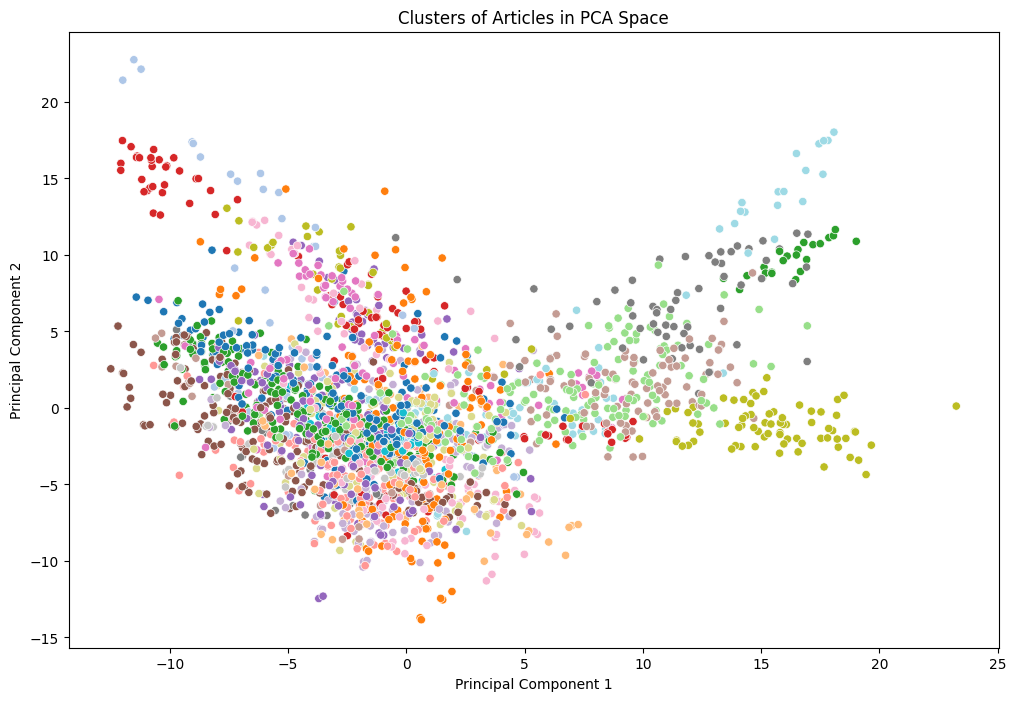

In [23]:
# Plot the PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df, palette='tab20', legend=False)
plt.title('Clusters of Articles in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [24]:
# Get top words for each cluster
top_words_per_cluster = []

for i in range(50):
    # Get the articles in the cluster
    cluster_indices = np.where(df['cluster'] == i)[0]
    
    # Get the average TF-IDF vector for the cluster
    cluster_tfidf = np.mean(X_tfidf[cluster_indices], axis=0)
    
    # Get the top words for this cluster
    top_indices = np.argsort(cluster_tfidf)[::-1][:10]
    top_words = [features[index] for index in top_indices]
    top_words_per_cluster.append(top_words)

# Print top words for each cluster
for i, words in enumerate(top_words_per_cluster):
    print(f"Cluster {i+1}: {', '.join(words)}")


Cluster 1: natwest, sfa, owen, options, markets, bank, derivatives, barings, pounds, said
Cluster 2: kellogg, quaker, snapple, cereal, ventritex, triarc, said, mills, quarter, beverage
Cluster 3: shanghai, markets, said, china, debt, state, market, plane, shenzhen, securities
Cluster 4: bt, mci, concert, telecom, telecoms, telefonica, global, amp, alliance, billion
Cluster 5: hwang, korean, north, seoul, pyongyang, south, korea, beijing, embassy, kim
Cluster 6: kong, hong, china, chinese, said, handover, territory, british, beijing, taiwan
Cluster 7: bre, busang, gold, freeport, mining, indonesian, strathcona, barrick, walsh, said
Cluster 8: said, amp, itt, mci, distance, service, corp, company, hilton, customers
Cluster 9: tonnes, china, tonne, chinese, said, copper, traders, prices, lme, zinc
Cluster 10: nomura, scandal, securities, japan, yen, sesc, brokerage, japanese, deals, sokaiya
Cluster 11: quarter, said, company, million, percent, share, year, earnings, sales, revenues
Cluste

In [25]:
# To interpret the components, let's get the most significant words contributing to each component
components = pca.components_

# Get top 10 words for each component
top_n = 10
feature_names = vectorizer.get_feature_names_out()

for i, component in enumerate(components):
    top_indices = component.argsort()[-top_n:][::-1]
    top_words = [feature_names[index] for index in top_indices]
    print(f"Top words for Principal Component {i+1}: {', '.join(top_words)}")



Top words for Principal Component 1: beijing, china, leader, chinese, political, people, hong, kong, communist, territory
Top words for Principal Component 2: index, points, indices, toronto, composite, stocks, percent, gold, 14, minerals


    Q: What similarities are there between the texts?, what are common words used?

    A: Decided to do a PCA and clustering with the text data. trying to figure out any commonality within the data. helps mark what texts are similar through PC and also list out the words

    R: had 50 clusters due to the size of the data and created a plot of the PC1 v PC2. printed out the common words within each cluster and also the top words for each PC

    C: for PC1 we a lot of words pertaining to a certain topic with words such as "beijing, china, leader, chinese, political" focusing on something about china and politics. PC2 however is picks up more on trade or money with words pertaining to "index, points, composite, stocks, percent, gold". We can conclude that there are many text pertaining to some social and global aspects of trade and politics

#### Association rule mining

Revisit the notes on association rule mining and the R example on music playlists: playlists.R and playlists.csv. Then use the data on grocery purchases in groceries.txt and find some interesting association rules for these shopping baskets. The data file is a list of shopping baskets: one person's basket for each row, with multiple items per row separated by commas. Pick your own thresholds for lift and confidence; just be clear what these thresholds are and say why you picked them. Do your discovered item sets make sense? Present your discoveries in an interesting and visually appealing way.

Notes:

This is an exercise in visual and numerical story-telling. Do be clear in your description of what you've done, but keep the focus on the data, the figures, and the insights your analysis has drawn from the data, rather than technical details.
The data file is a list of baskets: one row per basket, with multiple items per row separated by commas. You'll have to cobble together your own code for processing this into the format expected by the "arules" package. This is not intrinsically all that hard, but it is the kind of data-wrangling wrinkle you'll encounter frequently on real problems, where your software package expects data in one format and the data comes in a different format. Figuring out how to bridge that gap is part of the assignment, and so we won't be giving tips on this fron

In [ ]:
import pandas as pd

# Load the data
with open('groceries.txt', 'r') as file:
    baskets = file.readlines()

baskets_list = [list(map(str.strip, basket.split(','))) for basket in baskets]
unique_items = sorted(set(item for basket in baskets_list for item in basket))

df = pd.DataFrame(0, index=range(len(baskets_list)), columns=unique_items)

for idx, basket in enumerate(baskets_list):
    df.loc[idx, basket] = 1

df.head()




,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


will read in the dataset and split absed on ',' and check for all the unique items in that are mentioned.
then will onehot encode to binary signaling if that item was present in a certain row. 

In [ ]:
from itertools import combinations

min_support = 0.001
min_count = min_support * len(df)

item_support = {}

for item in unique_items:
    support = df[item].sum()
    if support >= min_count:
        item_support[frozenset([item])] = support / len(df)

for item_pair in combinations(unique_items, 2):
    support = df[list(item_pair)].all(axis=1).sum()
    if support >= min_count:
        item_support[frozenset(item_pair)] = support / len(df)

item_support_df = pd.DataFrame(list(item_support.items()), columns=['itemset', 'support'])
item_support_df = item_support_df.sort_values(by='support', ascending=False)

item_support_df.head()


,itemset,support
154,(whole milk),0.255516
96,(other vegetables),0.193493
115,(rolls/buns),0.183935
130,(soda),0.174377
155,(yogurt),0.139502


chose to set min_support to .001 since I chose to look at only 1 item in a set. So the more datapoints the better 

In [ ]:
min_confidence = 0.4

rules = []

for itemset in item_support_df['itemset']:
    if len(itemset) > 1:
        for item in itemset:
            antecedent = frozenset([item])
            consequent = itemset - antecedent

            antecedent_support = item_support.get(frozenset(antecedent), 0)
            rule_support = item_support.get(frozenset(itemset), 0)
            consequent_support = item_support.get(frozenset(consequent), 0)

            if antecedent_support == 0 or consequent_support == 0 or rule_support == 0:
                continue

            confidence = rule_support / antecedent_support
            if confidence >= min_confidence:
                lift = confidence / consequent_support

                rules.append({
                    'antecedent': antecedent,
                    'consequent': consequent,
                    'support': rule_support,
                    'confidence': confidence,
                    'lift': lift 
                })

rules_df = pd.DataFrame(rules)

if 'lift' in rules_df.columns:
    rules_df = rules_df.sort_values(by='lift', ascending=False)
    print(rules_df.head())
else:
    print("No rules with valid lift were found.")


        antecedent         consequent   support  confidence      lift
46        (liquor)     (bottled beer)  0.004677    0.422018  5.240594
36         (herbs)  (root vegetables)  0.007016    0.431250  3.956477
55          (rice)  (root vegetables)  0.003152    0.413333  3.792102
65  (meat spreads)           (yogurt)  0.001830    0.428571  3.072157
78         (honey)       (whole milk)  0.001118    0.733333  2.870009


put confidence to be at .4 due to the fact at too large of a confidence it is unable to capture a lot of points

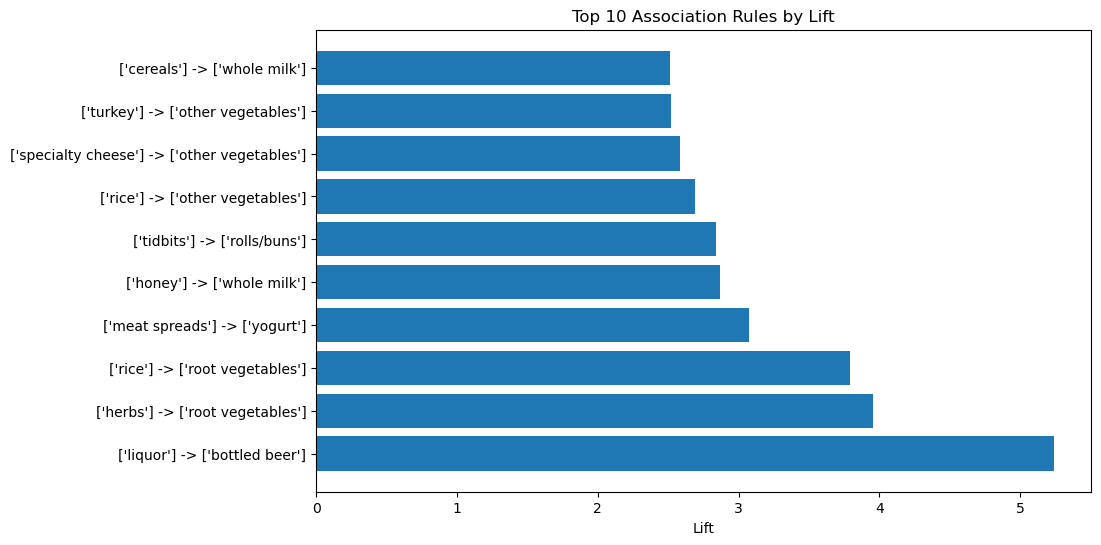

In [ ]:
import matplotlib.pyplot as plt
top_rules = rules_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_rules)), top_rules['lift'], align='center')
plt.yticks(range(len(top_rules)), [f"{list(rule['antecedent'])} -> {list(rule['consequent'])}" for _, rule in top_rules.iterrows()])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.show()


for lift I had it show the top 10 and we can evaluate that they are all well above 1, showing good association.
the results seem to make sense and true 

#### Image classification with neural networks

In this problem, you will train a neural network to classify satellite images. In the data/EuroSAT_RGB directory, you will find 11 subdirectories, each corresponding to a different class of land or land use: e.g. industrial, crops, rivers, forest, etc. Within each subdirectory, you will find examples in .jpg format of each type. (Thus the name of the directory in which the image lives is the class label.)

Your job is to set up a neural network that can classify the images as accurately as possible. Use an 80/20 train test split. Summarize your model and its accuracy in any way you see fit, but make you include at a minimum the following elements:

overall test-set accuracy, measured however you think is appropriate
show some of the example images from the test set, together with your model's predicted classes.
a confusion matrix showing the performance of the model on the set test, i.e. a table that cross-tabulates each test set example by (actual class, predicted class).
I strongly recommend the use of PyTorch in a Jupyter notebook for this problem; look into PyTorch's ImageFolder data set class, which will streamline things considerably.

Epoch 1, Loss: 1.2585940881128663
Epoch 2, Loss: 0.8567400562321699
Epoch 3, Loss: 0.7470355434770938
Epoch 4, Loss: 0.6605851196359706
Epoch 5, Loss: 0.5941062237819036
Test Accuracy: 75.59%


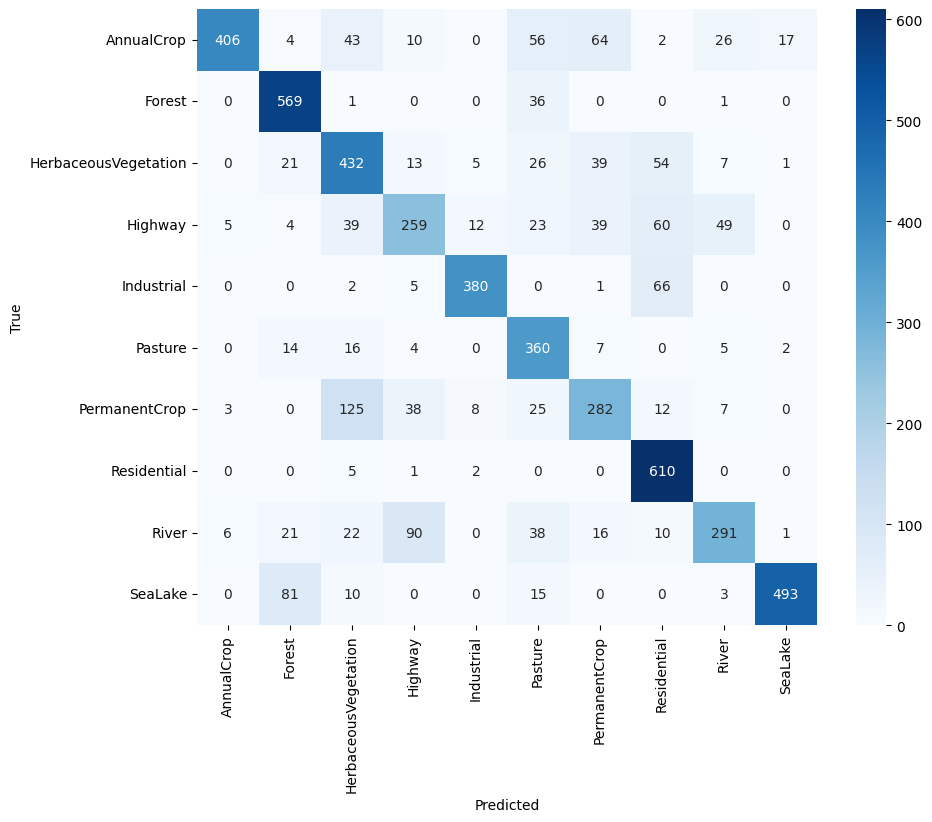

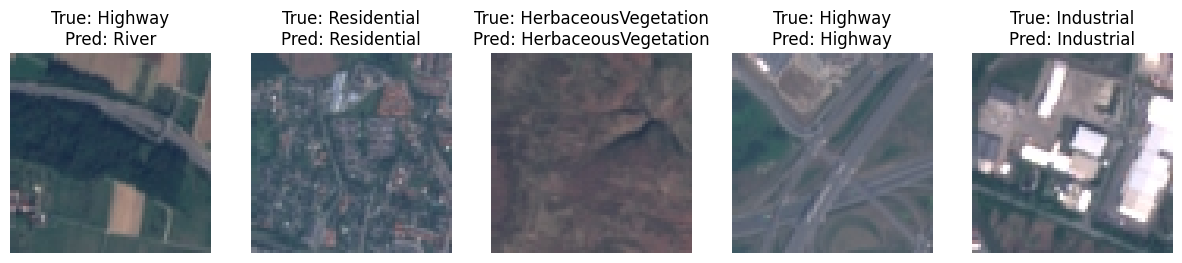

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 1. Data Loading and Preprocessing
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

data_dir = 'EuroSAT_RGB'
dataset = datasets.ImageFolder(data_dir, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Reduce each dimension by half
        self.fc1 = nn.Linear(32 * 16 * 16, 128)  # Adjust based on the output size after pooling
        self.fc2 = nn.Linear(128, 11)  # 11 classes

    def forward(self, x):
        x = torch.relu(self.conv1(x)) 
        x = self.pool(x)              
        x = torch.relu(self.conv2(x)) 
        x = self.pool(x)             
        
        # Flatten the tensor
        x = x.view(-1, 32 * 16 * 16)  
        
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# 3. Training the Model
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# 4. Evaluating the Model
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Accuracy
accuracy = sum(np.array(all_preds) == np.array(all_labels)) / len(all_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 5. Show Example Images with Predictions
data_iter = iter(test_loader)
images, labels = next(data_iter)
outputs = model(images)
_, preds = torch.max(outputs, 1)

# Plot images with predicted and actual labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax = axes[i]
    img = images[i].permute(1, 2, 0).numpy()
    ax.imshow(img)
    ax.set_title(f"True: {dataset.classes[labels[i]]}\nPred: {dataset.classes[preds[i]]}")
    ax.axis('off')

plt.show()
